In [63]:
import pandas
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [105]:
# train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
# train_close = train[['Date','Close.Last']]
# test_close = test[['Date','Close.Last']]

# print(test_close.head())
# print(train_close.head())

data = pd.read_csv("./data/time-series.csv")
data.sort_index(inplace=True, ascending=False)
data.reset_index(inplace=True)
data = data[["Date", "Close.Last"]]

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.head()

150


,Close.Last
Date,
2014-08-07,0.4365
2014-08-08,0.4750
2014-08-11,0.4725
2014-08-12,0.4725
2014-08-13,0.4753


In [106]:
values = df['Close.Last'].values.reshape(-1, 1)
values

array([[  0.4365],
       [  0.475 ],
       [  0.4725],
       ...,
       [107.27  ],
       [100.45  ],
       [104.25  ]])

In [107]:
# Quantos dias eu vou olhar para atrás?
look_back = 5

# Create sequences
generator = TimeseriesGenerator(data = values,
                                targets = values,
                                length=look_back,
                                batch_size=1)

In [108]:
## criando um modelo LSTM

model = Sequential()
model.add(Input(shape=(look_back, 1)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [111]:
## fitando o modelo

model.fit(generator, epochs=10)

Epoch 1/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.2860
Epoch 2/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.4306
Epoch 3/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.7862
Epoch 4/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.9132
Epoch 5/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.8460
Epoch 6/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.5515
Epoch 7/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.8197
Epoch 8/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.7185
Epoch 9/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.3575
Epoch 10/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.1836


In [177]:
# sliding windows para predição
# quero ir do último valor até n-150
# range é definido por range(start, stop, step) 

start = len(df) - len(test) - 5
end = len(df) - 5
step = 1

predictions = []
for i, value in enumerate(range(start, end)):
    x, _ = generator[value]
    print(f"observação {i}\n{x}")
    y_pred = model.predict(x)
    print(f"para predição do {value}, temos: {y_pred}")
    predictions.append(y_pred[0][0])

observação 0
[[[48.83 ]
  [49.279]
  [49.417]
  [49.522]
  [49.522]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
para predição do 2361, temos: [[48.94352]]
observação 1
[[[49.279]
  [49.417]
  [49.522]
  [49.522]
  [48.168]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
para predição do 2362, temos: [[48.281513]]
observação 2
[[[49.417]
  [49.522]
  [49.522]
  [48.168]
  [47.569]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
para predição do 2363, temos: [[47.664646]]
observação 3
[[[49.522]
  [49.522]
  [48.168]
  [47.569]
  [47.998]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
para predição do 2364, temos: [[47.66066]]
observação 4
[[[49.522]
  [48.168]
  [47.569]
  [47.998]
  [49.097]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
para predição do 2365, temos: [[48.274723]]
observação 5
[[[48.168]
  [47.569]
  [47.998]
  [49.097]
  [52.253]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
para predição do 2366, temos: [[50.521465]]
observação 6
[[[47.569]
  [47.998]
  [49.097]
  [52.253]
  [53.14 ]]]
1/1 ━━━━━━━━━━━━━━━━

In [178]:
predictions

[48.94352,
 48.281513,
 47.664646,
 47.66066,
 48.274723,
 50.521465,
 51.638645,
 52.791725,
 53.517174,
 53.787434,
 55.01089,
 55.169582,
 55.859203,
 57.80278,
 58.29484,
 58.563232,
 59.818237,
 60.35462,
 60.119408,
 61.031757,
 61.560993,
 60.941536,
 61.64383,
 64.213104,
 67.142,
 66.43274,
 67.93386,
 68.183426,
 69.90459,
 70.37598,
 70.45182,
 71.7352,
 71.445786,
 71.28403,
 70.1202,
 68.50499,
 75.78033,
 76.78705,
 76.409996,
 76.3843,
 76.620895,
 77.09295,
 79.39042,
 82.130394,
 82.819,
 85.20775,
 89.119286,
 86.0309,
 85.345276,
 88.19432,
 88.12927,
 86.454704,
 86.321106,
 86.681816,
 86.773575,
 87.268295,
 88.1272,
 90.34115,
 91.22629,
 90.38929,
 89.777466,
 89.24552,
 88.771324,
 87.90266,
 87.28224,
 86.14531,
 85.76118,
 85.55115,
 84.452126,
 84.5835,
 87.075516,
 85.9067,
 84.9826,
 85.36665,
 84.448235,
 83.2361,
 80.99287,
 77.86206,
 80.13292,
 78.56267,
 79.60793,
 84.60603,
 84.53529,
 83.67859,
 83.06581,
 83.50063,
 85.58005,
 88.401566,
 87.331604

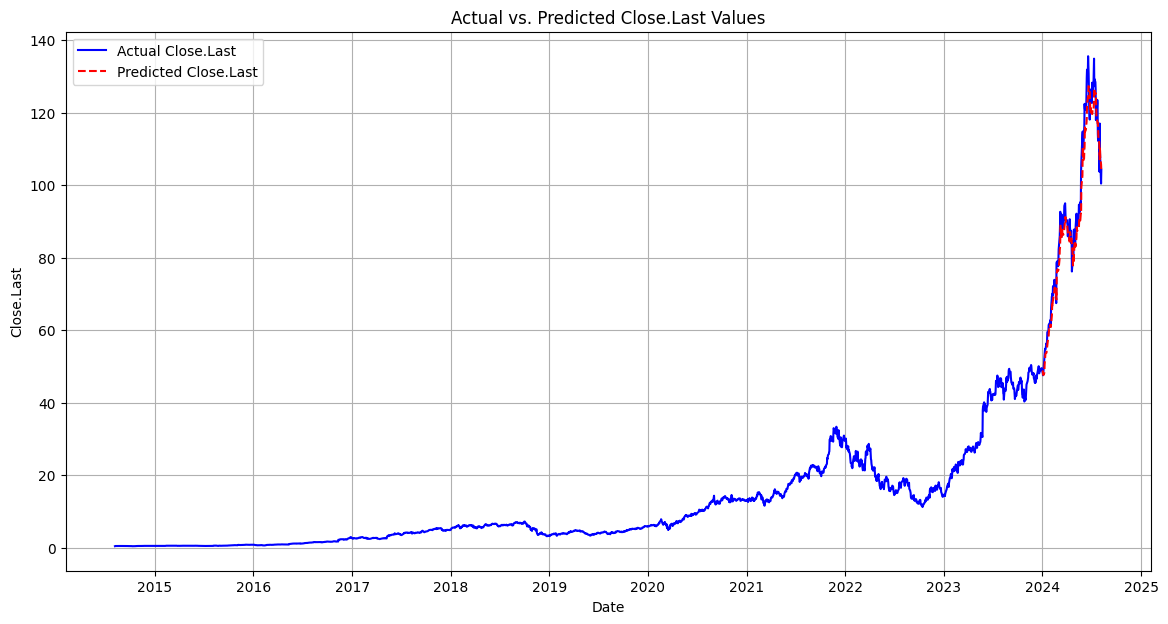

In [179]:
import matplotlib.pyplot as plt

# Ensure you have the DataFrame with the actual values and predictions
# Assuming df is your DataFrame and 'Predicted_Close.Last' contains the predictions

# Indices for plotting
actual_indices = df.index
predicted_indices = df.index[-len(predictions):]  # Indices for the predicted values

# Plot the actual values
plt.figure(figsize=(14, 7))
plt.plot(actual_indices, df['Close.Last'], label='Actual Close.Last', color='blue')

# Plot the predicted values
plt.plot(predicted_indices, predictions, label='Predicted Close.Last', color='red', linestyle='--')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Close.Last')
plt.title('Actual vs. Predicted Close.Last Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
